In [1]:
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('/content/tallest_people_in_the_world (1).csv')

In [ ]:
df.shape

(157, 14)

In [ ]:
df.sample(5)

,id,name,gender,country,continent,height_cm,height_ft_in,weight_kg,birth_year,death_year,lifespan,occupation,medical_condition,is_alive
9,10,Bernard Coyne,Male,USA,North America,249,8 ft 2 in,NaN,1897,1921.0,24,NaN,Gigantism,0
129,130,Tibor Pleiss,Male,Germany,Europe,221,7 ft 3 in,122.0,1989,NaN,37,Athlete,Genetic,1
126,127,Swede Halbrook,Male,USA,North America,221,7 ft 3 in,107.0,1933,1988.0,55,Athlete,Genetic,0
79,80,Jaime Clemente Izquierdo,Male,Spain,Europe,233,7 ft 8 in,NaN,1961,2005.0,44,NaN,Gigantism,0
54,55,Louis Moilanen,Male,USA,North America,246,8 ft 1 in,NaN,1886,1913.0,27,Entertainer,Gigantism,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 157 non-null    int64  
 1   name               157 non-null    object 
 2   gender             157 non-null    object 
 3   country            157 non-null    object 
 4   continent          157 non-null    object 
 5   height_cm          157 non-null    int64  
 6   height_ft_in       157 non-null    object 
 7   weight_kg          74 non-null     float64
 8   birth_year         157 non-null    int64  
 9   death_year         84 non-null     float64
 10  lifespan           157 non-null    int64  
 11  occupation         111 non-null    object 
 12  medical_condition  157 non-null    object 
 13  is_alive           157 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 17.3+ KB


In [8]:
df.isnull().sum()

,0
id,0
name,0
gender,0
country,0
continent,0
height_cm,0
height_ft_in,0
weight_kg,83
birth_year,0
death_year,73


In [9]:
df.describe()

,id,height_cm,weight_kg,birth_year,death_year,lifespan,is_alive
count,157.000000,157.000000,74.000000,157.000000,84.000000,157.000000,157.000000
mean,79.000000,233.904459,143.945946,1938.471338,1942.000000,42.554140,0.464968
std,45.466105,11.800578,34.046259,73.375794,83.778394,15.189147,0.500367
min,1.000000,210.000000,79.000000,1600.000000,1633.000000,16.000000,0.000000
25%,40.000000,224.000000,119.250000,1916.000000,1912.750000,32.000000,0.000000
50%,79.000000,233.000000,140.000000,1966.000000,1961.000000,41.000000,0.000000
75%,118.000000,241.000000,167.500000,1985.000000,2008.250000,51.000000,1.000000
max,157.000000,272.000000,230.000000,2010.000000,2025.000000,98.000000,1.000000


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.corr(numeric_only=True)


,id,height_cm,weight_kg,birth_year,death_year,lifespan,is_alive
id,1.000000,-0.838430,-0.420011,0.237673,0.126534,0.076115,0.302060
height_cm,-0.838430,1.000000,0.415319,-0.333787,-0.187444,-0.193183,-0.451651
weight_kg,-0.420011,0.415319,1.000000,-0.346033,-0.228707,-0.027607,-0.376542
birth_year,0.237673,-0.333787,-0.346033,1.000000,0.984036,-0.049912,0.550778
death_year,0.126534,-0.187444,-0.228707,0.984036,1.000000,0.159331,NaN
lifespan,0.076115,-0.193183,-0.027607,-0.049912,0.159331,1.000000,0.108422
is_alive,0.302060,-0.451651,-0.376542,0.550778,NaN,0.108422,1.000000


In [12]:
df.select_dtypes(include='object').columns


Index(['name', 'gender', 'country', 'continent', 'height_ft_in', 'occupation',
       'medical_condition'],
      dtype='object')

In [13]:
df['country'].value_counts()


,count
country,
USA,29
China,12
UK,9
Germany,7
Canada,7
...,...
Tanzania,1
Montenegro,1
Cape Verde,1


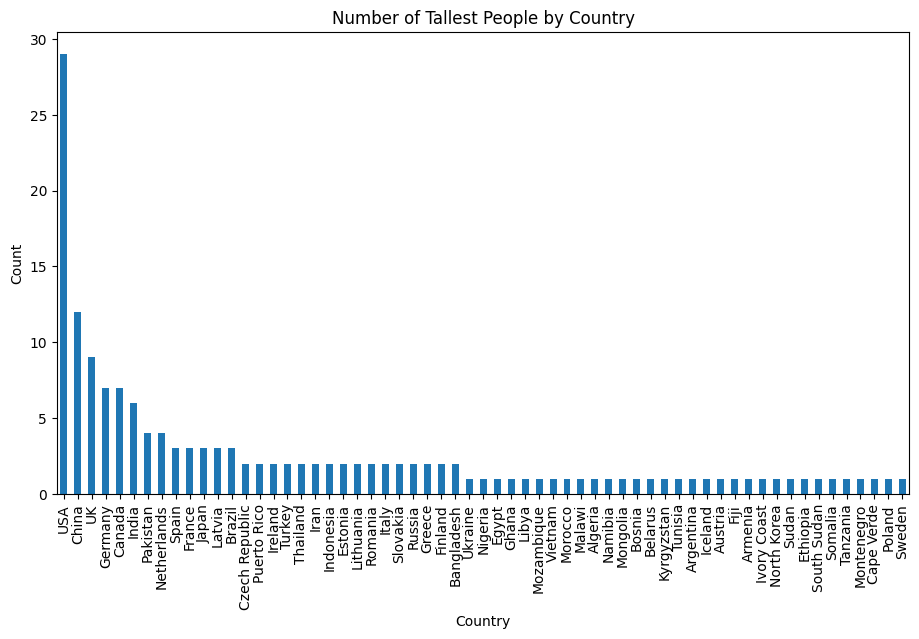

In [14]:
import matplotlib.pyplot as plt

df['country'].value_counts().plot(kind='bar',figsize=(11,6))

plt.title("Number of Tallest People by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


In [15]:
gender_counts = df['gender'].value_counts()
print(gender_counts)


gender
Male      132
Female     25
Name: count, dtype: int64


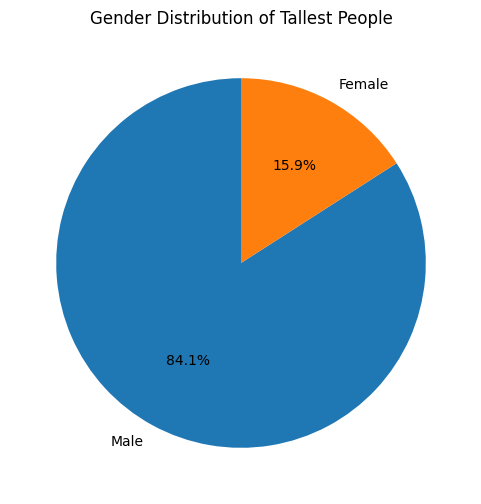

In [16]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6,6))

plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Gender Distribution of Tallest People")

plt.show()


In [17]:
condition_counts = df['medical_condition'].value_counts()
print(condition_counts)


medical_condition
Gigantism     81
Genetic       47
Acromegaly    29
Name: count, dtype: int64


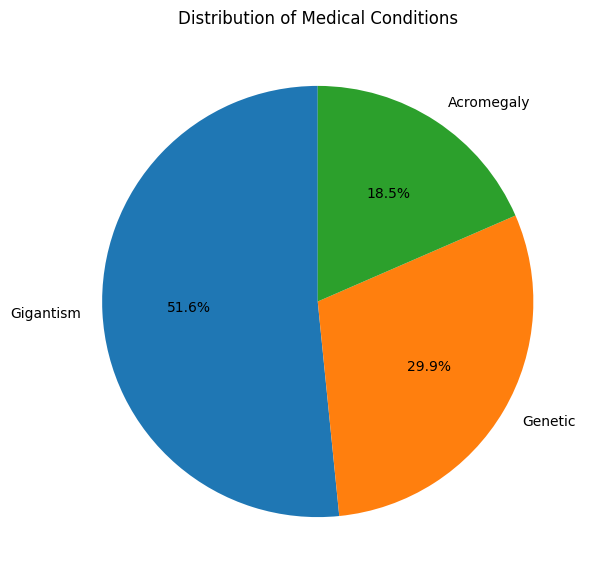

In [18]:
import matplotlib.pyplot as plt

condition_counts = df['medical_condition'].value_counts()

plt.figure(figsize=(7,7))

plt.pie(
    condition_counts,
    labels=condition_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Distribution of Medical Conditions")

plt.show()


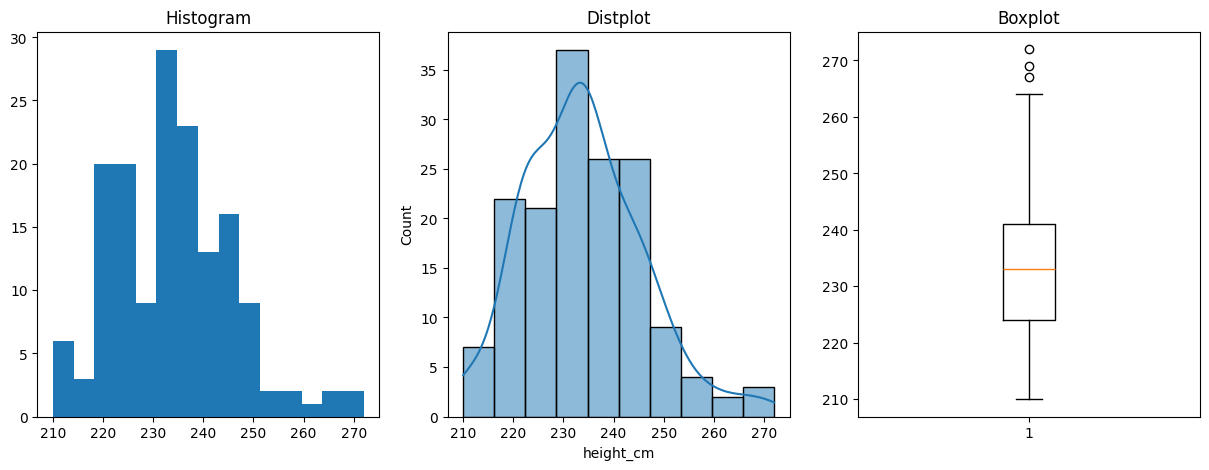

In [19]:
plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
plt.hist(df['height_cm'], bins=15)
plt.title("Histogram")

# Distplot
plt.subplot(1,3,2)
sns.histplot(df['height_cm'], kde=True)
plt.title("Distplot")

# Boxplot
plt.subplot(1,3,3)
plt.boxplot(df['height_cm'])
plt.title("Boxplot")

plt.show()


# 📊 Exploratory Data Analysis (EDA) – Univariate Analysis Project

## 👩‍💻 Author

**Syeda Fatima Sajid**
Computer Systems Engineer (Graduated July 2025)

---

## 📌 Project Overview

This project focuses on **Univariate Exploratory Data Analysis (EDA)** using the dataset **"Tallest People in the World"**. The main purpose of this project is to understand individual variables through statistical summaries and visualizations.


---

## 🎯 Objectives

* Load and explore a real-world dataset
* Understand data structure and quality
* Analyze numerical and categorical variables
* Visualize distributions
* Identify patterns and outliers
* Build strong foundations in EDA

---

## 📂 Dataset Information

Source: Kaggle – Tallest People in the World Dataset

Number of Records: 157
Number of Columns: 14

### Main Columns

* id
* name
* gender
* country
* continent
* height_cm
* height_ft_in
* weight_kg
* birth_year
* death_year
* lifespan
* occupation
* medical_condition
* is_alive

---

## 🧹 Data Loading

The dataset was loaded using Pandas:

* `pd.read_csv()`
* File path: `/content/tallest_people_in_the_world.csv`

Shape of dataset: **(157, 14)**

---

## 🔍 Initial Exploration

The following functions were used to understand the dataset:

* `df.shape`
* `df.sample()`
* `df.info()`
* `df.describe()`
* `df.isnull().sum()`
* `df.duplicated().sum()`

### Findings

* No duplicate records found
* Some missing values in `weight_kg`, `death_year`, and `occupation`
* Data types were verified
* Dataset is mostly clean

---

## 📊 Data Types

### Numerical Columns

* id
* height_cm
* weight_kg
* birth_year
* death_year
* lifespan
* is_alive

### Categorical Columns

* name
* gender
* country
* continent
* height_ft_in
* occupation
* medical_condition

---

## 📈 Correlation Analysis

Correlation was calculated using:

`df.corr(numeric_only=True)`

This helped analyze relationships between numerical variables.

---

## 📉 Univariate Analysis

Univariate analysis focuses on **one variable at a time**.

---

### 1️⃣ Country Distribution (Bar Chart)

Used:

* `value_counts()`
* Bar plot using Matplotlib

Purpose:
To identify countries with the highest number of tallest individuals.

Insight:
Some countries have more tallest individuals compared to others.

---

### 2️⃣ Gender Distribution (Pie Chart)

Used:

* `value_counts()`
* Pie chart

Result:

* Male: 132
* Female: 25

Insight:
Most tallest people in the dataset are male.

---

### 3️⃣ Medical Condition Distribution (Pie Chart)

Categories:

* Gigantism
* Genetic
* Acromegaly

Insight:
Gigantism is the most common medical condition among tallest people.

---

### 4️⃣ Numerical Data Analysis (Height)

The following plots were created:

#### Histogram

Shows frequency distribution of height.

#### Distplot

Shows density and spread of height values.

#### Boxplot

Identifies outliers and data spread.

---

## 📌 Key Observations

* Most heights are centered around 230 cm
* The data follows a near-normal distribution
* Few extreme outliers exist
* Males dominate the dataset
* Gigantism is the leading medical condition

---



## 🧠 Learning Outcomes

Through this project, I learned:

* How to load and explore datasets
* How to handle missing values
* How to analyze categorical variables
* How to visualize numerical distributions
* How to interpret graphs
* How to perform basic correlation analysis


---

## 📌 Conclusion

This project helped strengthen my understanding of Univariate EDA. It improved my ability to explore, visualize, and interpret real-world data. These skills are essential before applying any Machine Learning algorithms.

